In [1]:
import numpy as np
import matplotlib.pyplot as plt

def correlate_and_plot(data, channel_1, channel_2, wrt):
    # Check if the WRT is present in both channels
    if wrt not in data[channel_1] or wrt not in data[channel_2]:
        print(f"WRT {wrt} not found in both channels.")
        return

    # Extract data for the specific WRT
    data_channel_1 = data[channel_1][wrt]
    data_channel_2 = data[channel_2][wrt]

    # Calculate the difference (correlation can vary based on your needs)
    min_length = min(len(data_channel_1), len(data_channel_2))
    differences = data_channel_1[:min_length] - data_channel_2[:min_length]

    # Plot the histogram of the differences
    plt.figure(figsize=(10, 6))
    plt.hist(differences, bins=50, alpha=0.7)
    plt.xlabel("Difference in Time (ps)")
    plt.ylabel("Frequency")
    plt.title(f"Histogram of Time Differences between Channel {channel_1} and Channel {channel_2} for WRT {wrt}")
    plt.show()

    # Calculate correlation coefficient for the two data sets (optional)
    correlation = np.corrcoef(data_channel_1[:min_length], data_channel_2[:min_length])[0, 1]
    print(f"Correlation coefficient between Channel {channel_1} and Channel {channel_2} for WRT {wrt}: {correlation}")

import pickle
# Load the data
with open('data_store.pkl', 'rb') as file:
    retreived_data = pickle.load(file)


In [6]:
retreived_data[2]

{1488638.0: array([48111757670539, 48111758670554, 48111759670768, ...,
        49111814093300, 49111815093467, 49111816093446], dtype=int64),
 1488639.0: array([1.56580643e+04, 1.01556231e+06, 2.01551555e+06, ...,
        9.99997670e+11, 9.99998670e+11, 9.99999670e+11]),
 1488640.0: array([6.70512930e+05, 1.67054517e+06, 2.67054441e+06, ...,
        9.99997327e+11, 9.99998327e+11, 9.99999327e+11]),
 1488641.0: array([3.26992459e+05, 1.32698470e+06, 2.32702494e+06, ...,
        9.99997992e+11, 9.99998992e+11, 9.99999992e+11]),
 1488642.0: array([9.92868667e+05, 1.99277891e+06, 2.99280415e+06, ...,
        9.99997658e+11, 9.99998658e+11, 9.99999658e+11]),
 1488643.0: array([6.58229665e+05, 1.65819891e+06, 2.65827714e+06, ...,
        9.99997320e+11, 9.99998320e+11, 9.99999320e+11]),
 1488644.0: array([3.20042875e+05, 1.32010711e+06, 2.32011635e+06, ...,
        9.99997970e+11, 9.99998971e+11, 9.99999971e+11]),
 1488645.0: array([9.70998975e+05, 1.97106921e+06, 2.97120245e+06, ...,
     

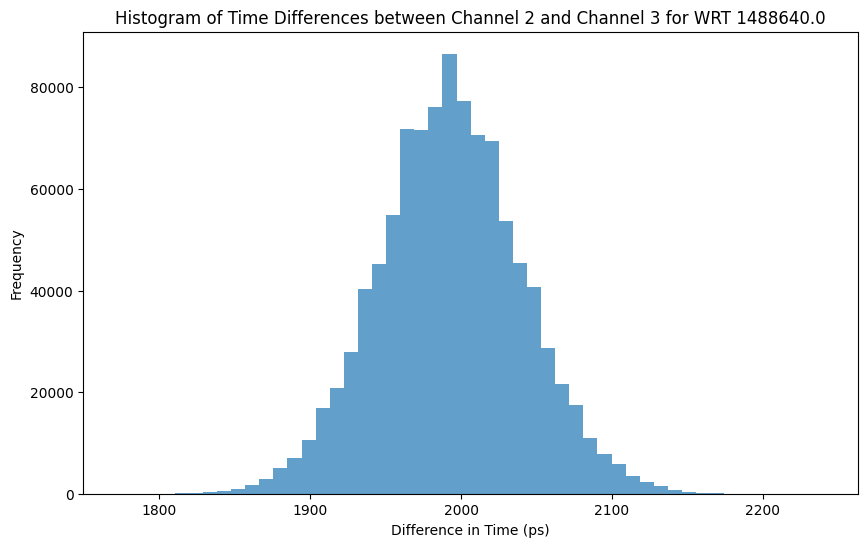

Correlation coefficient between Channel 2 and Channel 3 for WRT 1488640.0: 0.9999999999999983


In [7]:

# Example usage
correlate_and_plot(retreived_data, 2, 3, 1488640.0)

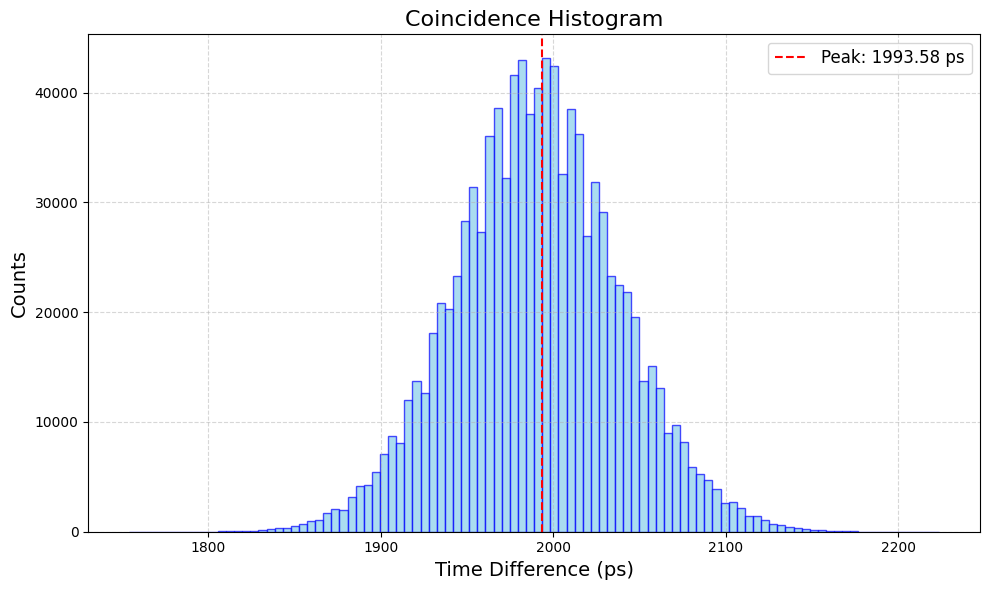

Peak time: 1993.580838317871


In [21]:
import numpy as np
import matplotlib.pyplot as plt

import pickle
# Load the data
with open('data_store.pkl', 'rb') as file:
    retreived_data = pickle.load(file)

def coincidence(data_store, channel_1, channel_2, wrt, peak0=0, range_ns=1, bins=50):
    # Extract data for the specific WRT for both channels
    if wrt not in data_store[channel_1] or wrt not in data_store[channel_2]:
        print(f"WRT {wrt} not found in both channels.")
        return None, None

    timestamps1 = data_store[channel_1][wrt]
    timestamps2 = data_store[channel_2][wrt]
    
    # Initialize variables
    CH1coin = []
    CH2coin = []
    ii_start = 0
    range_ps = 1e3 * range_ns
    # Find coincidences
    for jj in range(len(timestamps1)):
        for ii in range(ii_start, len(timestamps2)):
            dtt = timestamps2[ii] - timestamps1[jj] + peak0  # Time difference with peak offset
            if dtt < -range_ps / 2:
                ii_start = ii
            elif dtt > range_ps / 2:
                break
            else:
                CH1coin.append(timestamps1[jj])
                CH2coin.append(timestamps2[ii] + peak0)
    
    # Convert lists to arrays
    CH1coin = np.array(CH1coin)
    CH2coin = np.array(CH2coin)
    
    # Calculate the time differences
    dtime = CH1coin - CH2coin
    
    # Calculate the histogram of time differences
    histo_vals, bin_edges = np.histogram(dtime, bins=bins)
    
    # Find the bin with the peak (maximum count)
    peak_index = np.argmax(histo_vals)
    peak = bin_edges[peak_index]
    # Return the histogram and peak information
    
    # Find the bin with the peak (maximum count)
    peak_index = np.argmax(histo_vals)
    peak = bin_edges[peak_index]
    
    # Return the histogram and peak information
    return (histo_vals, bin_edges), peak

def plot_histogram(histo, peak, title="Coincidence Histogram", xlabel="Time Difference (ps)", ylabel="Counts"):
    """
    Plot the histogram of time differences with the peak highlighted.

    Args:
        histo (tuple): Tuple containing histogram values and bin edges as returned by numpy.histogram.
        peak (float): The peak time to highlight.
        title (str): Title of the plot.
        xlabel (str): Label for the x-axis.
        ylabel (str): Label for the y-axis.
    """
    if histo is None or peak is None:
        print("No data available to plot.")
        return

    histo_vals, bin_edges = histo

    # Plot the histogram
    plt.figure(figsize=(10, 6))
    plt.bar(bin_edges[:-1], histo_vals, width=np.diff(bin_edges), align="edge", alpha=0.7, color="skyblue", edgecolor="blue")
    
    # Highlight the peak
    plt.axvline(x=peak, color="red", linestyle="--", linewidth=1.5, label=f"Peak: {peak:.2f} ps")
    
    # Add title and labels
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()
    
    # Show the plot
    plt.show()

# Example usage
histo, peak = coincidence(retreived_data, 2, 3, 1488641.0, peak0=0, range_ns=5, bins=100)
plot_histogram(histo, peak)

print("Peak time:", peak)



Optimized version

999988
999988


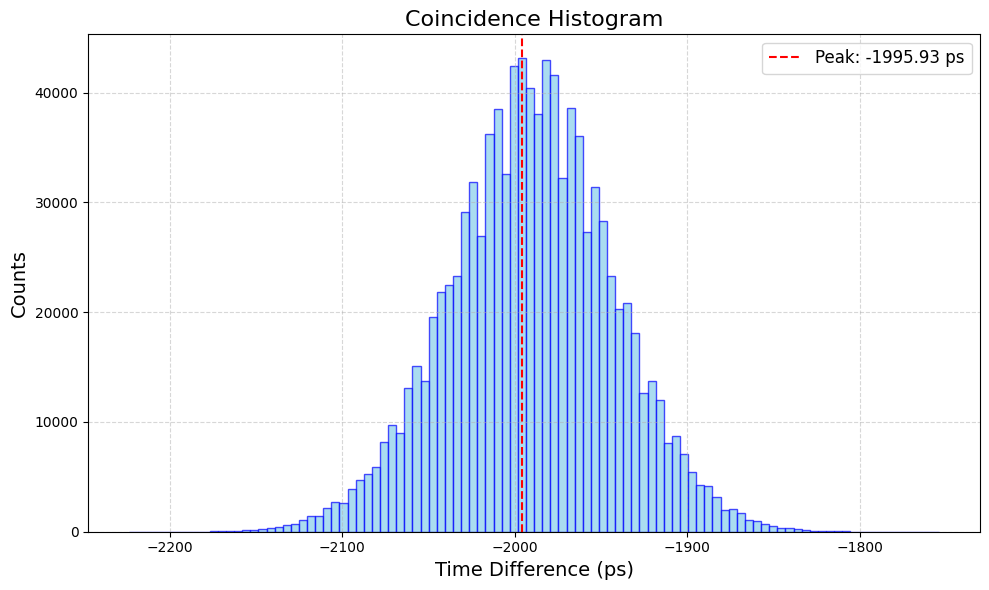

Peak time: -1995.9306980895994


In [38]:
import numpy as np

def calculate_coincidences(timestamps1, timestamps2, peak0=0, range_ns=1, bins=50):
    """
    Calculate coincidences between two timestamp arrays using an efficient approach.

    Args:
        timestamps1 (array-like): Array of timestamps for the first channel.
        timestamps2 (array-like): Array of timestamps for the second channel.
        peak0 (float): Initial peak offset in picoseconds.
        range_ns (float): Time range for coincidences in nanoseconds.
        bins (int): Number of bins for the histogram.

    Returns:
        tuple: (histogram values, bin edges), peak time.
    """

    # Initialize variables
    range_ps = 1e3 * range_ns  # Convert range from ns to ps
    half_range_ps = range_ps / 2

    # Find coincidences using a sliding window approach
    coincidences = []
    idx2 = 0

    for t1 in timestamps1:
        while idx2 < len(timestamps2) and timestamps2[idx2] < t1 - half_range_ps:
            idx2 += 1

        start_idx = idx2
        while idx2 < len(timestamps2) and timestamps2[idx2] <= t1 + half_range_ps:
            dtime = t1 - (timestamps2[idx2] + peak0)
            coincidences.append(dtime)
            idx2 += 1
        #print(len(coincidences))
        # Reset idx2 to the start index for the next iteration
        idx2 = start_idx

    # Convert coincidences to a numpy array
    coincidences = np.array(coincidences)
    print(len(coincidences))
    print(len(timestamps1))

    # Calculate the histogram of time differences
    histo_vals, bin_edges = np.histogram(coincidences, bins=bins)

    # Find the bin with the peak (maximum count)
    peak_index = np.argmax(histo_vals)
    peak = (bin_edges[peak_index] + bin_edges[peak_index + 1]) / 2

    return (histo_vals, bin_edges), peak

# Example usage
wrt = 1488641.0
ch1 = 3
ch2 = 2

timestamps1 = retreived_data[ch1][wrt]
timestamps2 = retreived_data[ch2][wrt]
histo, peak = calculate_coincidences(timestamps1, timestamps2, peak0=0, range_ns=5, bins=100)

# Plot histogram (plot_histogram should be your custom function)
plot_histogram(histo, peak)

print("Peak time:", peak)



In [ ]:
import numpy as np
import matplotlib.pyplot as plt



def optimized_coincidence_memory_efficient(data_store, channel_1, channel_2, wrt, peak0=0, range_ns=1000, bins=50):
    # Extract data for the specific WRT for both channels
    if wrt not in data_store[channel_1] or wrt not in data_store[channel_2]:
        print(f"WRT {wrt} not found in both channels.")
        return None, None

    CH1 = np.sort(data_store[channel_1][wrt])
    CH2 = np.sort(data_store[channel_2][wrt] + peak0)  # Apply peak offset and sort

    # Initialize list to store valid time differences
    valid_differences = []

    # Set up indices
    j = 0
    range_ns_half = range_ns / 2

    # Sliding window technique
    for i in range(len(CH1)):
        # Move the starting index j to keep CH2[j] close to CH1[i]
        while j < len(CH2) and CH2[j] < CH1[i] - range_ns_half:
            j += 1

        # Check within the range for possible coincidences
        k = j
        while k < len(CH2) and CH2[k] <= CH1[i] + range_ns_half:
            # Calculate the time difference and store it
            valid_differences.append(CH2[k] - CH1[i])
            k += 1

    # Convert list to numpy array
    valid_differences = np.array(valid_differences)

    # Plot histogram of the time differences
    histo_vals, bin_edges, _ = plt.hist(valid_differences, bins=bins)
    plt.xlabel("Time Difference (ns)")
    plt.ylabel("Coincidences in one bin")
    plt.title(f"Memory-Efficient Coincidence Histogram for WRT {wrt} between Channel {channel_1} and Channel {channel_2}")
    plt.show()

    # Find the bin with the peak (maximum count)
    peak_index = np.argmax(histo_vals)
    peak = bin_edges[peak_index]

    # Return histogram values and peak information
    return (histo_vals, bin_edges), peak



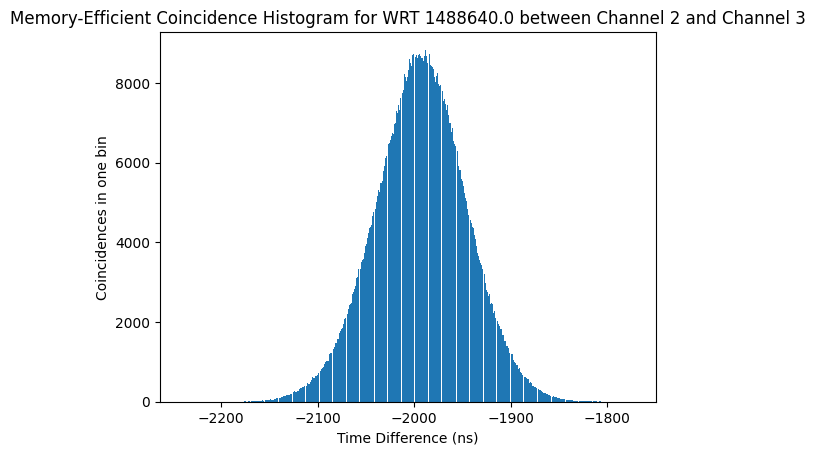

Histogram values: [1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 1.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 1.000e+00 1.000e+00
 1.000e+00 2.000e+00 1.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00
 2.000e+00 1.000e+00 1.000e+00 0.000e+00 3.000e+00 0.000e+00 1.000e+00
 2.000e+00 1.000e+00 2.000e+00 5.000e+00 0.000e+00 4.000e+00 5.000e+00
 4.000e+00 4.000e+00 0.000e+00 0.000e+00 4.000e+00 6.000e+00 8.000e+00
 2.000e+00 6.000e+00 2.000e+00 1.100e+01 6.000e+00 0.000e+00 6.000e+00
 1.500e+01 9.000e+00 1.000e+01 1.200e+01 9.000e+00 1.900e+01 1.700e+01
 3.000e+01 1.100e+01 2.200e+01 2.900e+01 3.900e+01 2.900e+01 0.000e+00
 2.600e+01 3.800e+01 4.900e+01 4.600e+01 3.600e+01 4.300e+0

In [ ]:
# Example usage
histo, peak = optimized_coincidence_memory_efficient(retreived_data, 2, 3, 1488640.0, peak0=0, range_ns=5000, bins=1000)
print("Histogram values:", histo[0])
print("Histogram bin edges:", histo[1])
print("Peak time:", peak)

In [6]:
import numpy as np
import matplotlib.pyplot as plt


def read_timestamps_from_datastore(data_store, channel_1, channel_2, wrt):
    """
    Reads timestamps for the specified channels and WRT from the datastore.

    Args:
        data_store (dict): The datastore containing timestamp data.
        channel_1 (int): The first channel to read timestamps from.
        channel_2 (int): The second channel to read timestamps from.
        wrt (float): The WRT value to look up.

    Returns:
        tuple: Timestamps for channel_1 and channel_2.
    """
    if wrt not in data_store[channel_1] or wrt not in data_store[channel_2]:
        raise ValueError(f"WRT {wrt} not found in both channels.")
    
    timestamps1 = data_store[channel_1][wrt]
    timestamps2 = data_store[channel_2][wrt]
    return timestamps1, timestamps2

def calculate_coincidences(timestamps1, timestamps2, peak0=0, range_ns=10, bins=50):
    """
    Calculate coincidences between two timestamp arrays.

    Args:
        timestamps1 (array-like): Array of timestamps for the first channel.
        timestamps2 (array-like): Array of timestamps for the second channel.
        peak0 (float): Initial peak offset in nanoseconds.
        range_ns (float): Range for coincidence window in nanoseconds.
        bins (int): Number of bins for the histogram.

    Returns:
        tuple: (histogram values, bin edges), peak time.
    """
    
    # Initialize variables
    CH1coin = []
    CH2coin = []
    ii_start = 0
    range_ps = 1e3 * range_ns
    # Find coincidences
    for jj in range(len(timestamps1)):
        for ii in range(ii_start, len(timestamps2)):
            dtt = timestamps2[ii] - timestamps1[jj] + peak0  # Time difference with peak offset
            if dtt < -range_ps / 2:
                ii_start = ii
            elif dtt > range_ps / 2:
                break
            else:
                CH1coin.append(timestamps1[jj])
                CH2coin.append(timestamps2[ii] + peak0)
    
    # Convert lists to arrays
    CH1coin = np.array(CH1coin)
    CH2coin = np.array(CH2coin)
    
    # Calculate the time differences
    dtime = CH1coin - CH2coin
    
    # Calculate the histogram of time differences
    histo_vals, bin_edges = np.histogram(dtime, bins=bins)
    
    # Find the bin with the peak (maximum count)
    peak_index = np.argmax(histo_vals)
    peak = bin_edges[peak_index]
    
    # Return the histogram and peak information
    #print("histo_vals is : ", histo_vals)
    #print("bin_edges is : ", bin_edges)
    #print("peak is : ", peak)
    return (histo_vals, bin_edges), peak

def plot_coincidence_histogram(histo_vals, bin_edges, channel_1, channel_2, wrt):
    """
    Plot a coincidence histogram.

    Args:
        histo_vals (array-like): Histogram values.
        bin_edges (array-like): Histogram bin edges.
        channel_1 (int): Channel 1 identifier.
        channel_2 (int): Channel 2 identifier.
        wrt (float): The WRT value associated with the data.
    """
    plt.bar(bin_edges[:-1], histo_vals, width=np.diff(bin_edges), align='edge')
    plt.xlabel("Time Difference (ns)")
    plt.ylabel("Coincidences in one bin")
    plt.title(f"Coincidence Histogram for WRT {wrt} between Channel {channel_1} and Channel {channel_2}")
    plt.show()

Code for coincidences


KeyboardInterrupt: 

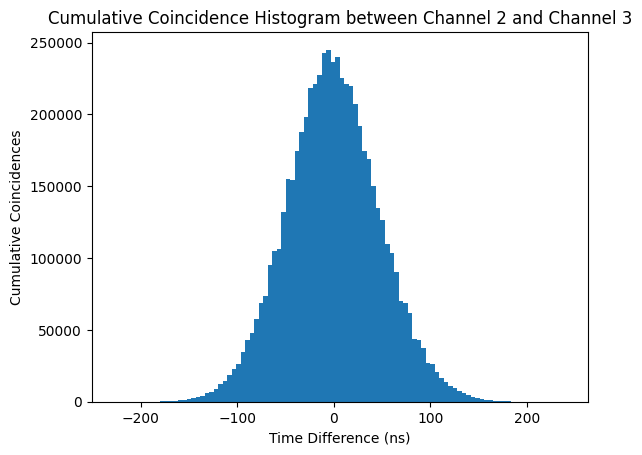

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import pickle
# Load the data
with open('data_store.pkl', 'rb') as file:
    retreived_data = pickle.load(file)

    
def update_cumulative_histogram_live(data_store, channel_1, channel_2, wrt_list, range_ns=10, bins=100):
    """
    Dynamically updates and displays a cumulative histogram as new WRT data is added.

    Args:
        data_store (dict): The datastore containing timestamp data.
        channel_1 (int): The first channel to read timestamps from.
        channel_2 (int): The second channel to read timestamps from.
        wrt_list (list): List of WRT values to process.
        range_ns (float): Range for coincidence window in nanoseconds.
        bins (int): Number of bins for the histogram.
    """
    # Initialize cumulative histogram
    cumulative_histo_vals = np.zeros(bins)
    bin_edges = None
    cumulative_peak = None
    # Set up the figure for live updating
    fig, ax = plt.subplots()
    display(fig)  # Display the figure in the notebook output

    for wrt in wrt_list:
        try:
            # Read timestamps for the given WRT
            timestamps1, timestamps2 = read_timestamps_from_datastore(data_store, channel_1, channel_2, wrt)
            
            # Calculate coincidences for the current WRT
            (histo_vals, current_bin_edges), peak = calculate_coincidences(
                timestamps1=timestamps1,
                timestamps2=timestamps2,
                peak0=2000,
                range_ns=range_ns,
                bins=bins
            )
            if not cumulative_peak: cumulative_peak = peak
            else: cumulative_peak = (cumulative_peak +peak)/2
            print(f"cumulative_peak : {cumulative_peak} and new peak: {peak}")
            # Initialize bin_edges if this is the first iteration
            if bin_edges is None:
                bin_edges = current_bin_edges
            
            # Add the current histogram values to the cumulative histogram
            cumulative_histo_vals += histo_vals
            
            
            ax.clear()
            ax.bar(bin_edges[:-1], cumulative_histo_vals, width=np.diff(bin_edges), align='edge')
            ax.set_xlabel("Time Difference (ns)")
            ax.set_ylabel("Cumulative Coincidences")
            ax.set_title(f"Cumulative Coincidence Histogram between Channel {channel_1} and Channel {channel_2}")
            
            # Redraw the updated figure
            display(fig)
            clear_output(wait=True)
            
            
        except ValueError as e:
            print(f"Skipping WRT {wrt}: {e}")

    plt.ioff()  # Turn off interactive mode
    plt.show()

# Example Usage
channel_1 = 2
channel_2 = 3
wrt_list = wrt_list = [1488640.0 +i for i in range(20)]  # Example WRT values
# Call the function to visualize cumulative histogram live
update_cumulative_histogram_live(
    data_store=retreived_data, 
    channel_1=channel_1, 
    channel_2=channel_2, 
    wrt_list=wrt_list,
    range_ns=5,
    bins=100
)


Peak time: 1992.3709619140625


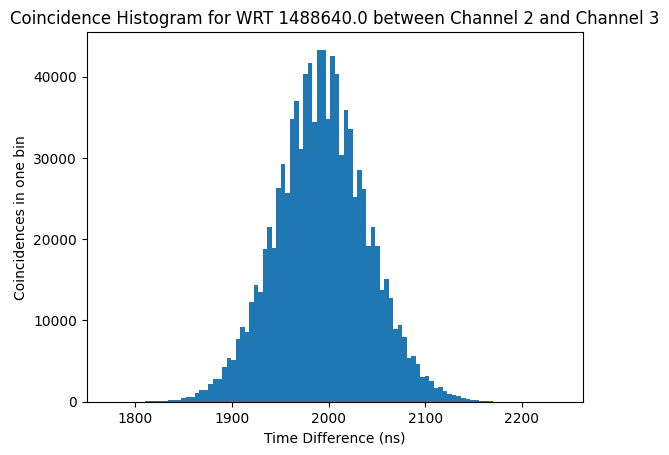

In [17]:
# Retrieve timestamps from datastore
channel_1 = 2
channel_2 = 3
wrt = 1488640.0

try:
    timestamps1, timestamps2 = read_timestamps_from_datastore(retreived_data, channel_1, channel_2, wrt)
    # Calculate coincidences
    (histo_vals, bin_edges), peak = calculate_coincidences(
        timestamps1=timestamps1,
        timestamps2=timestamps2,
        peak0=0,
        range_ns=5,
        bins=100
    )
    print("Peak time:", peak)
    
    # Plot the histogram
    plot_coincidence_histogram(histo_vals, bin_edges, channel_1, channel_2, wrt)

    
except ValueError as e:
    print(e)

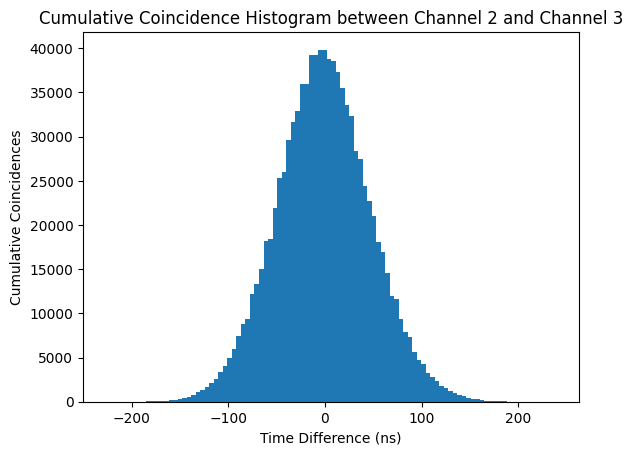

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import pickle

# Load the data
with open('data_store.pkl', 'rb') as file:
    retreived_data = pickle.load(file)

def update_cumulative_histogram_live(data_store, channel_1, channel_2, wrt_list, range_ns=10, bins=100):
    """
    Dynamically updates and displays a cumulative histogram as new WRT data is added.

    Args:
        data_store (dict): The datastore containing timestamp data.
        channel_1 (int): The first channel to read timestamps from.
        channel_2 (int): The second channel to read timestamps from.
        wrt_list (list): List of WRT values to process.
        range_ns (float): Range for coincidence window in nanoseconds.
        bins (int): Number of bins for the histogram.
    """
    # Initialize cumulative histogram and count
    cumulative_histo_vals = np.zeros(bins)
    bin_edges = None
    cumulative_peak = None
    update_count = 0  # Number of updates

    # Set up the figure for live updating
    fig, ax = plt.subplots()
    display(fig)  # Display the figure in the notebook output

    for wrt in wrt_list:
        try:
            # Read timestamps for the given WRT
            timestamps1, timestamps2 = read_timestamps_from_datastore(data_store, channel_1, channel_2, wrt)
            
            # Calculate coincidences for the current WRT
            (histo_vals, current_bin_edges), peak = calculate_coincidences(
                timestamps1=timestamps1,
                timestamps2=timestamps2,
                peak0=2000,
                range_ns=range_ns,
                bins=bins
            )
            
            # Initialize bin_edges if this is the first iteration
            if bin_edges is None:
                bin_edges = current_bin_edges
            
            # Update the cumulative histogram using a weighted average
            update_count += 1
            cumulative_histo_vals = (
                cumulative_histo_vals * (update_count - 1) + histo_vals
            ) / update_count

            # Update the cumulative peak using a running average
            if cumulative_peak is None:
                cumulative_peak = peak
            else:
                cumulative_peak = (cumulative_peak * (update_count - 1) + peak) / update_count
            
            print(f"Cumulative Peak: {cumulative_peak}, Current Peak: {peak}")

            # Update the plot
            ax.clear()
            ax.bar(bin_edges[:-1], cumulative_histo_vals, width=np.diff(bin_edges), align='edge')
            ax.set_xlabel("Time Difference (ns)")
            ax.set_ylabel("Cumulative Coincidences")
            ax.set_title(f"Cumulative Coincidence Histogram between Channel {channel_1} and Channel {channel_2}")
            
            # Redraw the updated figure
            display(fig)
            clear_output(wait=True)
            
        except ValueError as e:
            print(f"Skipping WRT {wrt}: {e}")

    plt.ioff()  # Turn off interactive mode
    plt.show()

# Example Usage
channel_1 = 2
channel_2 = 3
wrt_list = [1488640.0 + i for i in range(20)]  # Example WRT values

# Call the function to visualize cumulative histogram live
update_cumulative_histogram_live(
    data_store=retreived_data, 
    channel_1=channel_1, 
    channel_2=channel_2, 
    wrt_list=wrt_list,
    range_ns=5,
    bins=100
)

